**Torch Autograd** is PyTorch's automatic differentiation engine that powers neural network training by computing gradients of tensor operations. It enables the easy implementation of backpropagation for optimizing complex models, making it very good and easy to use due to its seamless integration with PyTorch's dynamic computation graph, allowing flexible model training.

In [ ]:
!pip install -q torchviz

In [ ]:
import torch
import matplotlib.pyplot as plt

## Automatic Differentiation with torch.autograd ( auto gradient computation )

Before proceeding autograd, will understand the basic terms.
- **Forward Propagation**( Forward Pass):
  - Computes the model's outpput by passing the input data thru network layers,it is often called *Forward Passs*.

- **Backward Propagation**:
  - Calculates the gradients of the loss with respect to the model's parameters using the chain rule, enabling parameter updates to minimize the loss.

### **torch.autograd**

- Create two tensors x and y with `requires_grad= True`, indicating to compute gradients for these tensors.
- Perform simple operations on x and y to obtain z.
- Computing Gradients: Call `z.backward()` with respest to x and y and the gradients are stored in the `grad` attribute of each tensor.

Tensors that require gradients will have their operations tracked by PyTorch's autograd engine, enabliing the computation of the gradients during backpropagation.

The automatic differentiation provided by `torch.autograd` simplifies this process by handling the complex chain rule calculations needed for backpropagation through the entire network.






For $\frac{\partial z}{\partial x}$:

$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial p} \frac{\partial p}{\partial x} + \frac{\partial z}{\partial q} \frac{\partial q}{\partial x} = 1 \cdot y + 1 \cdot 0 = y$$

For $\frac{\partial z}{\partial y}$:

$$\frac{\partial z}{\partial y} = \frac{\partial z}{\partial p} \frac{\partial p}{\partial y} + \frac{\partial z}{\partial q} \frac{\partial q}{\partial y} = 1 \cdot x + 1 \cdot 2y = x + 2y$$



In [ ]:
# create new two tensors with requires_grad= True (vector)
x = torch.tensor([2.0,5.0],requires_grad=True)
y = torch.tensor([3.0,7.0], requires_grad=True)

# Perform some operations
z= x*y+ y**2

z.retain_grad() # to store the gradient results in z.grad , if not specify then that will be none
# Since the nn has millions of tensors then storing gradient result auto will be huge memory.
# So we need to call `.retain_grad` manually to store the grad to look up

z_sum = z.sum().backward()

In [ ]:
print(f"Gradient of x: {x.grad}") # z w.r.t x
print(f"Gradient of y: {y.grad}") # z w.r.t y
print(f"Gradient of z: {z.grad}") # z w.r.t z

Gradient of x: tensor([3., 7.])
Gradient of y: tensor([ 8., 19.])
Gradient of z: tensor([1., 1.])


In [ ]:
print(f"Result of the Operation: z = {z.detach()}")

# takes the numerical value of z
# returns a new tensor with the same values
# but without a connection to the computational graph

Result of the Operation: z = tensor([15., 84.])


## Detaching Tensors

The `detach()` method is used to create a new tensor that shares storage with the original tensor but without tracking the operations. It returns a new new tensors that does not require gradients. Useful when to perform operations on a tensor without affecting the computation graph.

In [ ]:
# detach z from the computation graph
print("Before Detaching z from computation: ",z.requires_grad)
z_detached = z.detach()
print("After Detaching z from computation: ",z_detached.requires_grad)

Before Detaching z from computation:  True
After Detaching z from computation:  False


#### Other ways to use detach()

In [ ]:
# Stop gradients for part of the network
# For Feature extraction from a frozen network
with torch.no_grad():
  features = model.backbone(input)

# OR

features = model.backbone(input).detach()

**detach() vs no_grad()**

- `tensor.detach()`	returns a new tensor with no gradient	break gradient flow for specific tensor
- with `torch.no_grad()`:	disables gradient for everything inside block	inference / evaluation mode

In [ ]:
# Convert to numpy
# Must detach before converting to NumPy, otherwise PyTorch complains
tensor = some_tensor.detach().cpu().numpy()

In [ ]:
# Withoud detach()
x = torch.randn(3, requires_grad=True)
y = torch.randn(3, requires_grad= True)
z = x * y + y**2

z.retain_grad()        # keep gradient for intermediate tensor

loss = z.sum()         # scalar loss
loss.backward()        # compute gradients

print("z.grad:", z.grad)
print("x.grad:", x.grad)
print("y.grad:", y.grad)

z.grad: tensor([1., 1., 1.])
x.grad: tensor([-1.0036, -2.1928, -0.0937])
y.grad: tensor([-1.1265, -4.8506,  0.4646])


In [ ]:
# With Detach
z_detached2 = z.detach()
z_detached2.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

### Gradient Computation Graph

A computation graph is a visual representation of the sequence of operations performed on tensors in neural network, showing how each operation contributes to the final result.

`torchviz` is used to visualize the computation graph of any PyTorch model.

In [ ]:
from torchviz import make_dot

dot = make_dot(z, params= {"x":x, "y":y, "z":z})
dot.render("grad_computation_graph", format="png")

'grad_computation_graph.png'

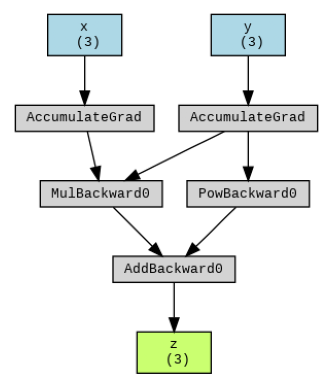

In [ ]:
img = plt.imread("grad_computation_graph.png")
plt.imshow(img)
plt.axis("off")
plt.show()

### Backpropagation cannot perform with requires_grad = False

In [ ]:
x = torch.tensor(1.0, requires_grad=False)
y = torch.tensor(2.0, requires_grad = False)

# Perform simple operations
z =x*y + y**2

loss = z.sum()
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## How Backpropagation works in Neural Networks

We have understood the mathematical intuition behind and how **torch.autograd** takes care of automatic differentiation with an example.

Then,
 * The loss is calculate between prediction and target using `loss(predcition,target`)
 * Then backpropagation is performed using `loss.backward()`
 * We update the new weights using `optimizer.step()`




**The Weight Update Formula is:**


$$ \mathbf{w}_{\text{new}} = \mathbf{w} - \eta \nabla L(\mathbf{w}) $$

The gradient of $ L $ is a vector of partial derivatives:

$$ \nabla L = \left( \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \ldots, \frac{\partial L}{\partial w_n} \right) $$

- **Current Weights $( \mathbf{w} )$**: These are the weights of the model before the update.
- **Learning Rate $( \eta )$**: A hyperparameter that controls the step size of the weight update. A smaller learning rate makes the training process slower but more precise, while a larger learning rate makes the training process faster but it may sometimes overshoot the optimal solution.
- **Gradient of the Loss $( \nabla L(\mathbf{w}) )$**: The partial derivatives of the loss function with respect to each weight. This indicates the direction and magnitude of the steepest ascent in the loss function.
- **Updated Weights $(\mathbf{w}_{\text{new}} )$**: The new weights after applying the gradient descent step.


After applying the updates, it's crucial to zero out the gradients. This is typically done using: `optimizer.zero_grad()`

